In [2]:
import scipy.cluster.hierarchy as sch #for dendogram
from sklearn.cluster import AgglomerativeClustering #for hierarchical
from sklearn.cluster import KMeans #for kmeans
from sklearn.cluster import DBSCAN #for DBSCAN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [5]:
data = pd.read_csv("C:/Users/krishna/Desktop/crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
#EDA
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
data1=data.copy()

In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data1.iloc[:,1:])

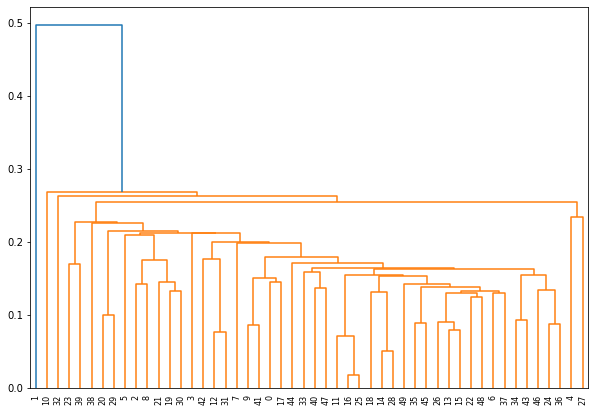

In [13]:
# create dendrogram
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [14]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')
#we need 4 clusters, distance is euclidean

In [15]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 3, 0, 1, 1, 0, 1, 1, 0, 0, 3, 1, 1, 1, 0, 1, 1, 3, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1], dtype=int64)

In [16]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [17]:
Clusters

,Clusters
0,0
1,2
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [18]:
data1['h_cluster']= Clusters
data1

,Murder,Assault,UrbanPop,Rape,h_cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [19]:
# hence we can see which datapoints goes to which cluster number and since the above hierarchical approach
#is not suitable for large data sets and for more consistent results, we go for K- means

# KMeans clustering

In [20]:
data2=data.copy()

In [21]:
#normalization function
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(data2)
X = stscaler.transform(data2)

In [22]:
#to find best k value we create elbow chart

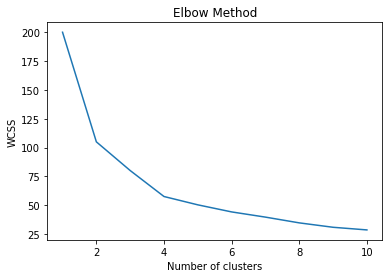

In [65]:
wcss = []
for i in range(1, 11): #we take for k= 1 to 10 
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia is average distance between the clusters
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
#from above chart we can take k=4 as our best k value

In [67]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(X)

KMeans(n_clusters=4, random_state=42)

In [68]:
clusters_new.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [69]:
#Assign clusters to the data set
data2['kmeancluster'] = clusters_new.labels_
data2

,Murder,Assault,UrbanPop,Rape,kmeancluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [70]:
data2.groupby('kmeancluster').agg(['mean']).reset_index() #to profile the cluster algorithm

,kmeancluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


# DBSCAN

In [71]:
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=6)

In [72]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [73]:
cl=pd.DataFrame(dbscan.labels_,columns=['Dbcluster']) # Assigning new cluster to the data set
cl

,Dbcluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [75]:
pd.concat([data,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,Dbcluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [80]:
data2.groupby('kmeancluster').agg(['mean']).reset_index()

,kmeancluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


In [83]:
#Above data is divided into 4 clusters which has a different set values 
# for murder, assault, urbanPop and Rape
# using this we can determine which state has higher crime rate
# states which comes under cluster 1 has higher Assaults rate
# we can say that  assualt crime rate is more as compare to all other crimes.   
#murder rate is less in the states which falls under cluster 3.